<a href="https://colab.research.google.com/github/Mohd3/Circular-Linked-List/blob/main/ANN_For_Smoke_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN For Smoke Detection

Mohammad Ahmad Zaiter

In this project, I will make a deep learning model to detect smoke, and with the help of plots, I will answer some questions, such as what are the factors most associated with the presence or absence of smoke and show the relationships between them.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
smoke_detection = pd.read_csv('smoke_detection.csv')

In [ ]:
smoke_detection.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
smoke_detection.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,62630.0,3.131450e+04,18079.868017,0.000000e+00,1.565725e+04,3.131450e+04,4.697175e+04,6.262900e+04
UTC,62630.0,1.654792e+09,110002.488078,1.654712e+09,1.654743e+09,1.654762e+09,1.654778e+09,1.655130e+09
Temperature[C],62630.0,1.597042e+01,14.359576,-2.201000e+01,1.099425e+01,2.013000e+01,2.540950e+01,5.993000e+01
Humidity[%],62630.0,4.853950e+01,8.865367,1.074000e+01,4.753000e+01,5.015000e+01,5.324000e+01,7.520000e+01
TVOC[ppb],62630.0,1.942058e+03,7811.589055,0.000000e+00,1.300000e+02,9.810000e+02,1.189000e+03,6.000000e+04
eCO2[ppm],62630.0,6.700210e+02,1905.885439,4.000000e+02,4.000000e+02,4.000000e+02,4.380000e+02,6.000000e+04
Raw H2,62630.0,1.294245e+04,272.464305,1.066800e+04,1.283000e+04,1.292400e+04,1.310900e+04,1.380300e+04
Raw Ethanol,62630.0,1.975426e+04,609.513156,1.531700e+04,1.943500e+04,1.950100e+04,2.007800e+04,2.141000e+04
Pressure[hPa],62630.0,9.386276e+02,1.331344,9.308520e+02,9.387000e+02,9.388160e+02,9.394180e+02,9.398610e+02
PM1.0,62630.0,1.005943e+02,922.524245,0.000000e+00,1.280000e+00,1.810000e+00,2.090000e+00,1.433369e+04


In [ ]:
smoke_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [ ]:
smoke_detection = smoke_detection.drop(['Unnamed: 0','UTC','CNT'], axis = 1)

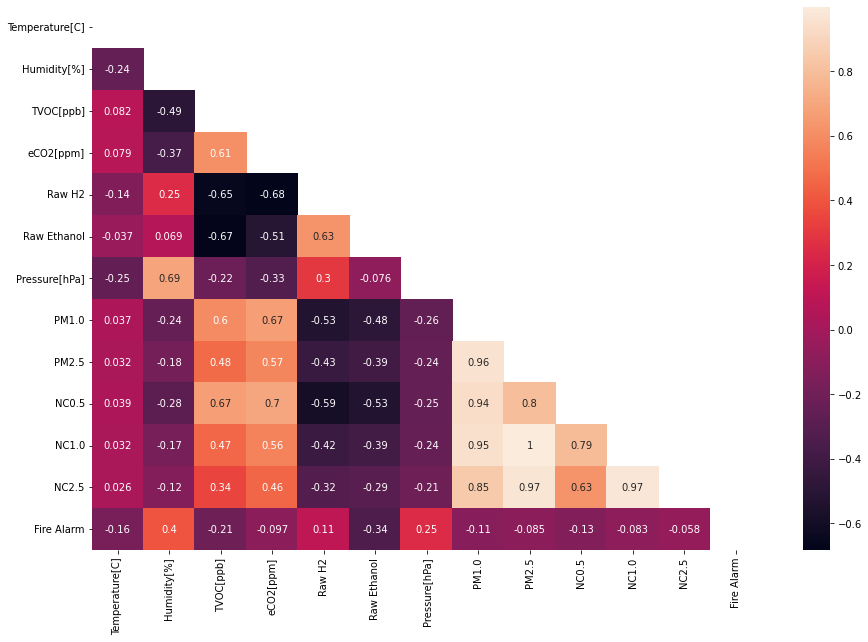

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(smoke_detection.corr(),annot=True,mask=np.triu(np.ones_like(smoke_detection.corr())))

In [ ]:
smoke_detection.drop(columns = ['NC1.0','PM1.0'],axis = 1,inplace =True)

In [ ]:
fig = px.scatter(smoke_detection, x="Raw Ethanol", y="TVOC[ppb]",color='Fire Alarm')
fig.show()

In [ ]:
fig = px.scatter(smoke_detection, x="Humidity[%]", y="TVOC[ppb]",color='Fire Alarm')
fig.show()

In [ ]:
fig = px.scatter(smoke_detection, x="Raw Ethanol", y="Raw H2",color='Fire Alarm')
fig.show()

In [ ]:
smoke_detection.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM2.5,NC0.5,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0


In [ ]:
fig = px.pie(smoke_detection, names=smoke_detection['Fire Alarm'], title='Target Variable')
fig.show() #imbalanced!

In [ ]:
smoke_detection['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

**Null Values**

In [ ]:
smoke_detection.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM2.5             0
NC0.5             0
NC2.5             0
Fire Alarm        0
dtype: int64

**Outliers**

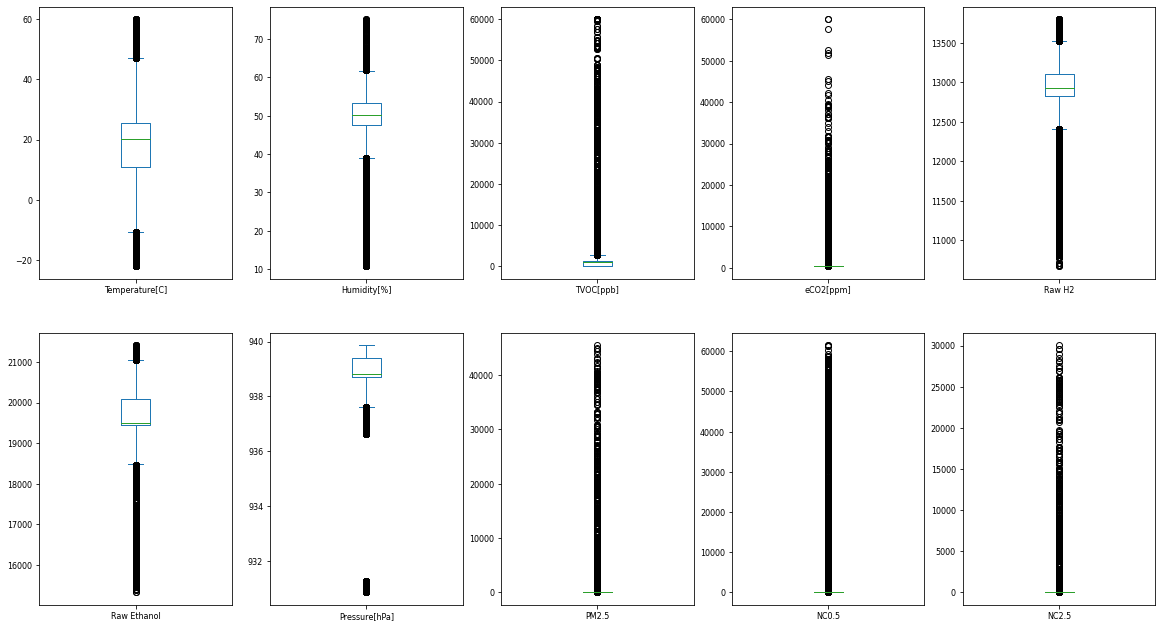

In [ ]:
smoke_detection.drop('Fire Alarm', axis=1).plot(kind='box', subplots=True
 , layout=(2,5), sharex=False, legend=True, fontsize=8, figsize=(20,11))
plt.show()

In [ ]:
cols = smoke_detection
Q1 = cols. quantile(0.25)
Q3 = cols. quantile(0.75)
IQR = Q3 - Q1
print("Old Shape: ", smoke_detection.shape)
smoke_detection = cols[~((cols < (Q1 - 1.5 * IQR)) |(cols > (Q3 + 1.5 * IQR))). any(axis=1)]
print("New Shape: ", smoke_detection.shape)

Old Shape:  (62630, 11)
New Shape:  (35689, 11)


In [ ]:
print("Duplicated: ",smoke_detection.duplicated().sum())

Duplicated:  0


# Modeling

In [ ]:
fig = px.pie(smoke_detection, names=smoke_detection['Fire Alarm'], title='Target Variable')
fig.show() #imbalanced!

In [ ]:
smoke_detection['Fire Alarm'].value_counts()

1    30797
0     4892
Name: Fire Alarm, dtype: int64

In [ ]:
x = smoke_detection.iloc[:,:10].values
y = smoke_detection.iloc[:,10].values
x

array([[23.056, 51.11 ,  1.   , ...,  0.14 ,  0.43 ,  0.056],
       [23.131, 50.08 ,  5.   , ...,  0.17 ,  0.46 ,  0.074],
       [23.142, 50.   ,  0.   , ...,  0.17 ,  0.49 ,  0.072],
       ...,
       [24.251, 45.   ,  7.   , ...,  2.26 , 14.95 ,  0.053],
       [24.329, 42.89 , 31.   , ...,  2.24 , 14.81 ,  0.052],
       [24.405, 41.35 , 31.   , ...,  2.27 , 15.07 ,  0.053]])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x, y = ros.fit_resample(x, y)

In [ ]:
smoke_detection

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM2.5,NC0.5,NC2.5,Fire Alarm
240,23.056,51.11,1,400,12626,19698,939.810,0.14,0.43,0.056,0
247,23.131,50.08,5,400,12633,19696,939.813,0.17,0.46,0.074,0
248,23.142,50.00,0,400,12629,19704,939.790,0.17,0.49,0.072,0
249,23.153,49.85,12,400,12630,19698,939.791,0.18,0.50,0.074,0
250,23.163,49.71,11,400,12637,19710,939.812,0.17,0.49,0.073,0
...,...,...,...,...,...,...,...,...,...,...,...
56967,24.173,44.99,17,415,12863,20774,937.630,2.26,15.00,0.053,0
56968,24.212,45.00,27,426,12853,20763,937.634,2.26,15.00,0.053,0
56969,24.251,45.00,7,414,12870,20795,937.624,2.26,14.95,0.053,0
56971,24.329,42.89,31,415,12871,20756,937.625,2.24,14.81,0.052,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43115, 10), (18479, 10), (43115,), (18479,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
sum(y_train == 1)

21559

In [ ]:
sum(y_train == 0)

21556

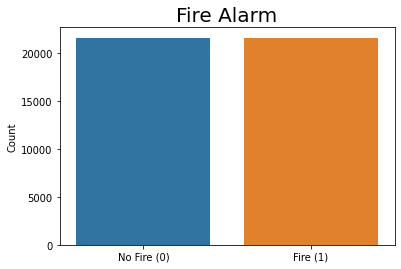

In [ ]:
sns.countplot(x = y_train)
plt.xticks([0, 1], ['No Fire (0)', 'Fire (1)'])
plt.ylabel('Count')
plt.title('Fire Alarm', fontsize = 20)
plt.show()

In [ ]:
import tensorflow as tf
from   tensorflow import keras

### Model 1

In [ ]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(5,input_shape=(10,)))
model1.add(keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
model1.compile(optimizer='sgd',
              loss='BinaryFocalCrossentropy',
              metrics=['Accuracy'])


In [ ]:
history= model1.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
1348/1348 [==============================] - 6s 4ms/step - loss: 0.0486 - Accuracy: 0.9356 - val_loss: 0.0359 - val_Accuracy: 0.9529
Epoch 2/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0336 - Accuracy: 0.9585 - val_loss: 0.0311 - val_Accuracy: 0.9628
Epoch 3/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0297 - Accuracy: 0.9645 - val_loss: 0.0279 - val_Accuracy: 0.9667
Epoch 4/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0268 - Accuracy: 0.9682 - val_loss: 0.0253 - val_Accuracy: 0.9705
Epoch 5/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0245 - Accuracy: 0.9717 - val_loss: 0.0232 - val_Accuracy: 0.9745
Epoch 6/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0226 - Accuracy: 0.9754 - val_loss: 0.0216 - val_Accuracy: 0.9751
Epoch 7/15
1348/1348 [==============================] - 7s 5ms/step - loss: 0.0211 - Accuracy: 0.9775 - val_loss: 0.0202 - val_Accuracy:

In [ ]:
scores=model1.evaluate(X_test,y_test)

578/578 [==============================] - 1s 2ms/step - loss: 0.0135 - Accuracy: 0.9896


In [ ]:
y_pred = model1.predict(X_test)
y_pred


578/578 [==============================] - 1s 1ms/step


array([[0.05032218],
       [0.08542306],
       [0.99999964],
       ...,
       [0.04878982],
       [0.02185211],
       [0.00362887]], dtype=float32)

In [ ]:
y_pred_class = np.round_(y_pred)
y_pred_class

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9214   27]
 [ 165 9073]]


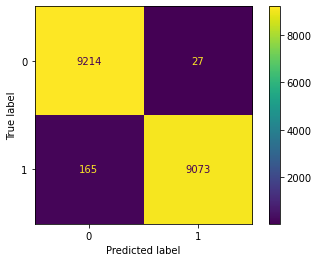

In [ ]:
from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9896098273716111

In [ ]:
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))


Accuracy: 98.96%


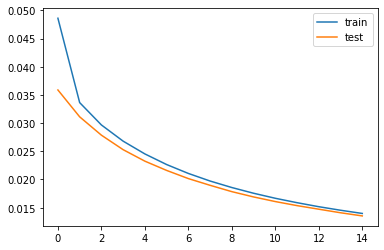

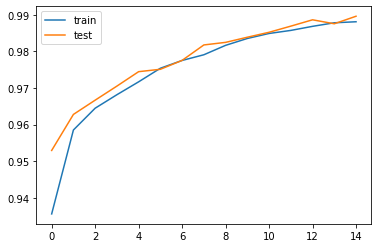

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()


pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

### Model 2

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(20,input_shape=(10,)))
model2.add(keras.layers.Dense(20,activation="tanh"))
model2.add(keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
model2.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['Accuracy'])


In [ ]:
history=model2.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
1348/1348 [==============================] - 6s 4ms/step - loss: 0.1013 - Accuracy: 0.9689 - val_loss: 0.0288 - val_Accuracy: 0.9914
Epoch 2/15
1348/1348 [==============================] - 5s 3ms/step - loss: 0.0172 - Accuracy: 0.9963 - val_loss: 0.0097 - val_Accuracy: 0.9990
Epoch 3/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0070 - Accuracy: 0.9989 - val_loss: 0.0042 - val_Accuracy: 0.9992
Epoch 4/15
1348/1348 [==============================] - 6s 4ms/step - loss: 0.0037 - Accuracy: 0.9991 - val_loss: 0.0025 - val_Accuracy: 0.9991
Epoch 5/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0019 - Accuracy: 0.9995 - val_loss: 0.0013 - val_Accuracy: 0.9995
Epoch 6/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0011 - Accuracy: 0.9998 - val_loss: 5.2835e-04 - val_Accuracy: 1.0000
Epoch 7/15
1348/1348 [==============================] - 5s 4ms/step - loss: 9.6390e-04 - Accuracy: 0.9998 - val_loss: 4.8213e-04 - v

In [ ]:
scores=model2.evaluate(X_test,y_test)

578/578 [==============================] - 1s 2ms/step - loss: 0.0023 - Accuracy: 0.9995


In [ ]:
y_pred = model2.predict(X_test)
y_pred


578/578 [==============================] - 1s 1ms/step


array([[4.7732460e-11],
       [8.5493046e-10],
       [1.0000000e+00],
       ...,
       [5.6049316e-07],
       [7.6050002e-09],
       [2.5887173e-11]], dtype=float32)

In [ ]:
y_pred_class = np.round_(y_pred)
y_pred_class

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9231   10]
 [   0 9238]]


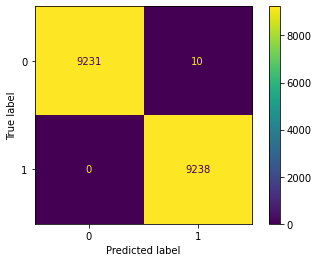

In [ ]:
from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9994588451756048

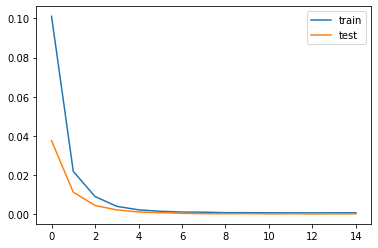

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

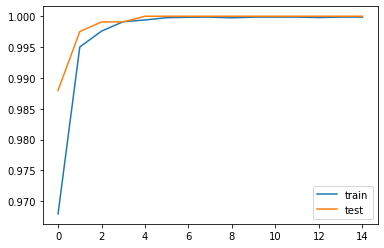

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

In [ ]:
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))


Accuracy: 99.95%


## Model 3

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(30,input_shape=(10,)))
model3.add(keras.layers.Dense(30,activation="relu"))
model3.add(keras.layers.Dense(2,activation="softmax"))

In [ ]:
model3.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['Accuracy'])

In [ ]:
history=model3.fit(X_train, y_train, epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
1348/1348 [==============================] - 7s 4ms/step - loss: 0.0730 - Accuracy: 0.9770 - val_loss: 0.0162 - val_Accuracy: 0.9932
Epoch 2/15
1348/1348 [==============================] - 5s 3ms/step - loss: 0.0068 - Accuracy: 0.9987 - val_loss: 0.0035 - val_Accuracy: 0.9991
Epoch 3/15
1348/1348 [==============================] - 4s 3ms/step - loss: 0.0024 - Accuracy: 0.9994 - val_loss: 0.0016 - val_Accuracy: 0.9995
Epoch 4/15
1348/1348 [==============================] - 5s 3ms/step - loss: 0.0014 - Accuracy: 0.9997 - val_loss: 8.5517e-04 - val_Accuracy: 0.9995
Epoch 5/15
1348/1348 [==============================] - 4s 3ms/step - loss: 8.9943e-04 - Accuracy: 0.9997 - val_loss: 4.4766e-04 - val_Accuracy: 0.9999
Epoch 6/15
1348/1348 [==============================] - 5s 3ms/step - loss: 5.9262e-04 - Accuracy: 0.9999 - val_loss: 0.0014 - val_Accuracy: 0.9995
Epoch 7/15
1348/1348 [==============================] - 4s 3ms/step - loss: 6.3089e-04 - Accuracy: 0.9999 - val_loss: 1.

In [ ]:
scores=model3.evaluate(X_test,y_test)

578/578 [==============================] - 1s 2ms/step - loss: 0.0063 - Accuracy: 0.9991


In [ ]:
y_pred = model3.predict(X_test)
y_pred


578/578 [==============================] - 1s 1ms/step


array([[1.0000000e+00, 2.1471117e-12],
       [1.0000000e+00, 4.9650475e-11],
       [0.0000000e+00, 1.0000000e+00],
       ...,
       [9.9999988e-01, 6.4527683e-08],
       [1.0000000e+00, 1.9489063e-12],
       [1.0000000e+00, 3.1494777e-21]], dtype=float32)

In [ ]:
y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9224   17]
 [   0 9238]]


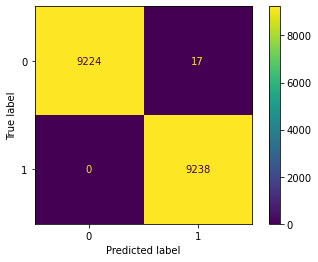

In [ ]:
from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9990800367985281

In [ ]:
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))


Accuracy: 99.91%


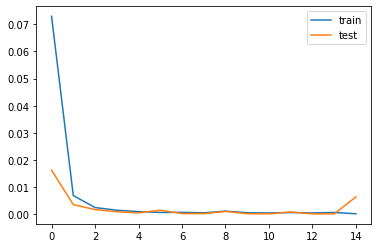

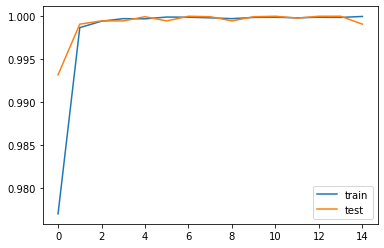

In [ ]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()


pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

## Model 4

In [ ]:

model4 = keras.Sequential()
model4.add(keras.layers.Dense(20,input_shape=(10,)))
model4.add(keras.layers.Dense(20,activation="relu",kernel_initializer='he_normal'))
model4.add(keras.layers.Dense(1,activation="sigmoid",kernel_initializer='he_normal'))
model4.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['Accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
history=model4.fit(X_train, y_train, epochs=15, callbacks=[early_stopping],validation_data=(X_test,y_test))

Epoch 1/15
1348/1348 [==============================] - 6s 4ms/step - loss: 0.0734 - Accuracy: 0.9773 - val_loss: 0.0158 - val_Accuracy: 0.9952
Epoch 2/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0075 - Accuracy: 0.9984 - val_loss: 0.0031 - val_Accuracy: 0.9992
Epoch 3/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0025 - Accuracy: 0.9993 - val_loss: 0.0019 - val_Accuracy: 0.9997
Epoch 4/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0019 - Accuracy: 0.9994 - val_loss: 8.3576e-04 - val_Accuracy: 0.9996
Epoch 5/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0011 - Accuracy: 0.9997 - val_loss: 4.2894e-04 - val_Accuracy: 1.0000
Epoch 6/15
1348/1348 [==============================] - 5s 4ms/step - loss: 7.6214e-04 - Accuracy: 0.9998 - val_loss: 0.0060 - val_Accuracy: 0.9988
Epoch 7/15
1348/1348 [==============================] - 5s 4ms/step - loss: 6.7858e-04 - Accuracy: 0.9997 - val_loss: 1.3100

In [ ]:
scores=model4.evaluate(X_test,y_test)

578/578 [==============================] - 1s 2ms/step - loss: 0.0017 - Accuracy: 0.9996


In [ ]:
y_pred = model4.predict(X_test)
y_pred


578/578 [==============================] - 1s 1ms/step


array([[3.6862540e-12],
       [6.5189916e-11],
       [1.0000000e+00],
       ...,
       [3.2702662e-08],
       [1.0640501e-11],
       [3.9016359e-09]], dtype=float32)

In [ ]:
y_pred_class = np.round_(y_pred)
y_pred_class

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9234    7]
 [   0 9238]]


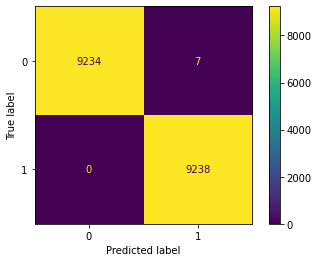

In [ ]:
from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9996211916229233

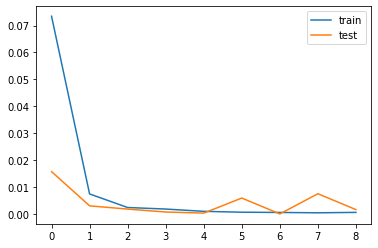

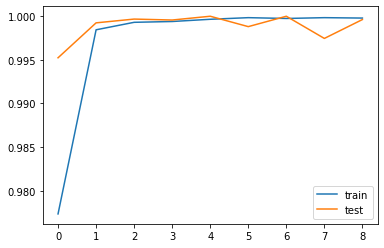

In [ ]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()


pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

## Model 5

In [ ]:

model5 = keras.Sequential()
model5.add(keras.layers.Dense(20,input_shape=(10,)))
model5.add(keras.layers.Dense(20,activation="relu",kernel_initializer='glorot_normal'))
model5.add(keras.layers.Dense(1,activation="sigmoid",kernel_initializer='glorot_normal'))
model5.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['Accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
history=model5.fit(X_train, y_train, epochs=20, callbacks=[early_stopping],validation_data=(X_test,y_test))

Epoch 1/20
1348/1348 [==============================] - 6s 4ms/step - loss: 0.0867 - Accuracy: 0.9745 - val_loss: 0.0330 - val_Accuracy: 0.9896
Epoch 2/20
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0184 - Accuracy: 0.9953 - val_loss: 0.0093 - val_Accuracy: 0.9989
Epoch 3/20
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0059 - Accuracy: 0.9989 - val_loss: 0.0038 - val_Accuracy: 0.9991
Epoch 4/20
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0028 - Accuracy: 0.9994 - val_loss: 0.0021 - val_Accuracy: 0.9993
Epoch 5/20
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0016 - Accuracy: 0.9995 - val_loss: 9.6631e-04 - val_Accuracy: 0.9997
Epoch 6/20
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0013 - Accuracy: 0.9996 - val_loss: 6.6303e-04 - val_Accuracy: 0.9999
Epoch 7/20
1348/1348 [==============================] - 5s 4ms/step - loss: 7.8164e-04 - Accuracy: 0.9998 - val_loss: 6.7989e-04

In [ ]:
scores=model5.evaluate(X_test,y_test)

578/578 [==============================] - 1s 2ms/step - loss: 0.0018 - Accuracy: 0.9994


In [ ]:
y_pred = model5.predict(X_test)
y_pred


578/578 [==============================] - 1s 1ms/step


array([[1.0208496e-12],
       [1.8021249e-11],
       [1.0000000e+00],
       ...,
       [6.6009804e-08],
       [3.4099907e-11],
       [1.1243362e-27]], dtype=float32)

In [ ]:
y_pred_class = np.round_(y_pred)
y_pred_class

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9236    5]
 [   6 9232]]


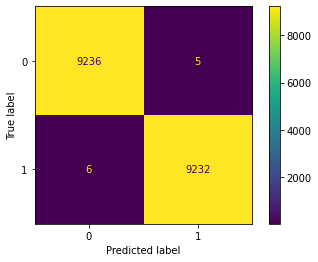

In [ ]:
from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(cm, display_labels = [0, 1])
cm.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9994047296931652

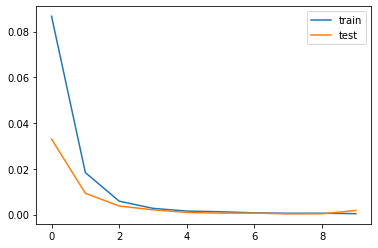

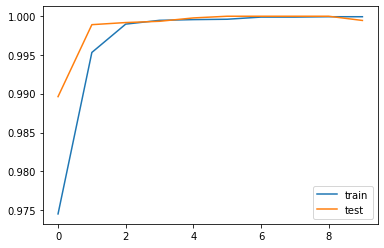

In [ ]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()


pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

## Model 6

In [ ]:
model6 = keras.Sequential()
model6.add(keras.layers.Dense(20,input_shape=(10,)))
model6.add(keras.layers.Dense(20,activation="relu",kernel_initializer='RandomNormal'))
model6.add(keras.layers.Dense(1,activation="sigmoid",kernel_initializer='RandomNormal'))
model6.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['Accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
history=model6.fit(X_train, y_train, epochs=15, callbacks=[early_stopping],validation_data=(X_test,y_test))

Epoch 1/15
1348/1348 [==============================] - 6s 4ms/step - loss: 0.1162 - Accuracy: 0.9656 - val_loss: 0.0335 - val_Accuracy: 0.9909
Epoch 2/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0240 - Accuracy: 0.9942 - val_loss: 0.0155 - val_Accuracy: 0.9954
Epoch 3/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0111 - Accuracy: 0.9980 - val_loss: 0.0071 - val_Accuracy: 0.9991
Epoch 4/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0064 - Accuracy: 0.9988 - val_loss: 0.0049 - val_Accuracy: 0.9991
Epoch 5/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0042 - Accuracy: 0.9989 - val_loss: 0.0026 - val_Accuracy: 0.9991
Epoch 6/15
1348/1348 [==============================] - 5s 3ms/step - loss: 0.0028 - Accuracy: 0.9990 - val_loss: 0.0017 - val_Accuracy: 0.9991
Epoch 7/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0017 - Accuracy: 0.9995 - val_loss: 0.0012 - val_Accuracy:

In [ ]:
scores=model6.evaluate(X_test,y_test)

578/578 [==============================] - 1s 2ms/step - loss: 9.2175e-04 - Accuracy: 0.9996


In [ ]:
y_pred = model6.predict(X_test)
y_pred

578/578 [==============================] - 1s 1ms/step


array([[3.7928566e-13],
       [1.4633242e-15],
       [1.0000000e+00],
       ...,
       [1.8053913e-17],
       [3.0720581e-17],
       [1.3148436e-34]], dtype=float32)

In [ ]:
y_pred_class = np.round_(y_pred)
y_pred_class

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9233    8]
 [   0 9238]]


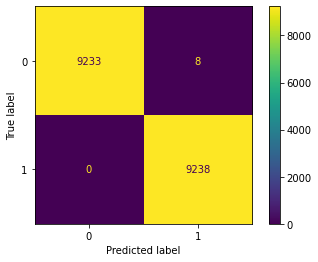

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

0.9995670761404838

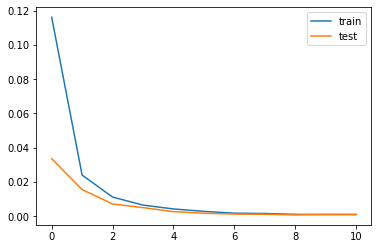

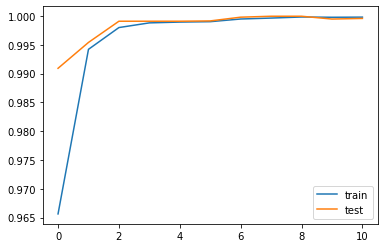

In [ ]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()


pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

## Model 7

In [ ]:
model7 = keras.Sequential()
model7.add(keras.layers.Dense(20,input_shape=(10,)))
model7.add(keras.layers.Dense(20,activation="relu"))
model7.add(keras.layers.Dense(1,activation="sigmoid"))
model7.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['Accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
history=model7.fit(X_train, y_train, epochs=15, callbacks=[early_stopping],validation_data=(X_test,y_test))

Epoch 1/15
1348/1348 [==============================] - 6s 4ms/step - loss: 0.0596 - Accuracy: 0.9824 - val_loss: 0.0082 - val_Accuracy: 0.9981
Epoch 2/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0047 - Accuracy: 0.9990 - val_loss: 0.0020 - val_Accuracy: 0.9995
Epoch 3/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0022 - Accuracy: 0.9995 - val_loss: 0.0011 - val_Accuracy: 0.9995
Epoch 4/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0015 - Accuracy: 0.9995 - val_loss: 6.5097e-04 - val_Accuracy: 0.9999
Epoch 5/15
1348/1348 [==============================] - 5s 4ms/step - loss: 8.4475e-04 - Accuracy: 0.9997 - val_loss: 4.3794e-04 - val_Accuracy: 1.0000
Epoch 6/15
1348/1348 [==============================] - 5s 4ms/step - loss: 0.0011 - Accuracy: 0.9997 - val_loss: 3.9690e-04 - val_Accuracy: 0.9999
Epoch 7/15
1348/1348 [==============================] - 5s 4ms/step - loss: 9.0669e-04 - Accuracy: 0.9998 - val_loss: 3.

In [ ]:
scores=model7.evaluate(X_test,y_test)

578/578 [==============================] - 1s 2ms/step - loss: 1.8651e-04 - Accuracy: 1.0000


In [ ]:
y_pred = model7.predict(X_test)
y_pred

578/578 [==============================] - 1s 1ms/step


array([[9.5852312e-11],
       [1.5434670e-10],
       [1.0000000e+00],
       ...,
       [7.9892857e-09],
       [2.0485587e-11],
       [2.9097885e-16]], dtype=float32)

In [ ]:
y_pred_class = np.round_(y_pred)
y_pred_class

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_class)

1.0

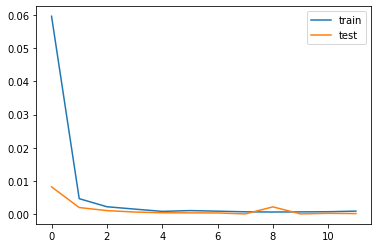

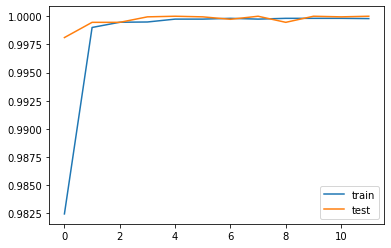

In [ ]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()


pyplot.plot(history.history['Accuracy'],label='train')
pyplot.plot(history.history['val_Accuracy'],label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[9241    0]
 [   0 9238]]


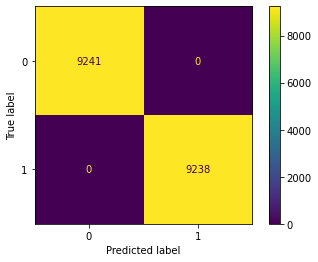

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()